# Purpose

The purpose of this notebook is to create a categorical model that will predict whether a flight will be delayed or not based on flight information as well as weather information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='pastel', font_scale=1.25)

In [2]:
df = pd.read_csv('full_30_data.csv')
df.head()

,tail_num,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,arr_delay_new,actual_elapsed_time,distance,...,arr_hour_19,arr_hour_20,arr_hour_21,arr_hour_22,arr_hour_23,dest_precip_type_rain,dest_precip_type_snow,origin_precip_type_rain,origin_precip_type_snow,delayed
0,N110AN,800,759.0,-1.0,1133,1058.0,-35.0,0.0,359.0,2475.0,...,0,0,0,0,0,0,0,0,0,0
1,N116AN,800,849.0,49.0,1133,1156.0,23.0,23.0,367.0,2475.0,...,0,0,0,0,0,1,0,0,0,0
2,N105NN,800,756.0,-4.0,1133,1108.0,-25.0,0.0,372.0,2475.0,...,0,0,0,0,0,1,0,0,0,0
3,N108NN,800,756.0,-4.0,1133,1126.0,-7.0,0.0,390.0,2475.0,...,0,0,0,0,0,1,0,0,0,0
4,N110AN,800,755.0,-5.0,1133,1112.0,-21.0,0.0,377.0,2475.0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.drop(['tail_num','crs_dep_time','dep_time','crs_arr_time'
         ,'arr_time','arr_delay_new','actual_elapsed_time',], axis=1, inplace=True)

In [4]:
df['delayed'].value_counts()

0    199686
1     35457
Name: delayed, dtype: int64

## Create subset of data

Using the cleaned data, I will create a subset of the data to do my training and testing. As we can see, the classifications are a little imbalanced. For now, I will carry on with modeling without dealing with these. For my problem, determining a flight is or is not delayed is equally as bad. Therefore, I will use the F1 score to determine whether a model is good for my problem or not as the F1 score will balance precision and recall. 

In [5]:
df_split = df.loc[np.random.choice(df[df['delayed']==1].index, 20000, replace = True)]
df_split2 = df.loc[np.random.choice(df[df['delayed']==0].index, 30000, replace = True)]

df_split = df_split.append(df_split2, ignore_index=True)

In [6]:
x = df_split.drop(['delayed', 'arr_delay','dep_delay'], axis=1)
y = df_split['delayed']

## Modelling 

Now that I have all of my features and targets, I will start my modeling. First, I will try all of the models and see which model produces the best F1 score. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import defaultdict

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

#visualization
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=888)

In [9]:
models = [KNeighborsClassifier(8), 
          GaussianNB(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest Classifier', 'Random Forest Regressor']

In [10]:
accuracy = []
precision_delay = []
recall_delay = []
f1_delay = []

## Go through the models and find the scores
for model in models:
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    
    accuracy.append( accuracy_score(y_test, y_hat) )
    precision_delay.append( precision_score(y_test, y_hat, pos_label=1) )
    recall_delay.append( recall_score(y_test, y_hat, pos_label=1))
    f1_delay.append( f1_score(y_test, y_hat, pos_label=1) )

lr = LogisticRegressionCV(penalty='l1', solver='liblinear', n_jobs=-1, verbose=5)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

accuracy.append( accuracy_score(y_test, y_pred) )
precision_delay.append( precision_score(y_test, y_pred, pos_label=1) )
recall_delay.append( recall_score(y_test, y_pred, pos_label=1))
f1_delay.append( f1_score(y_test, y_pred, pos_label=1) )

accuracy_df = pd.DataFrame({'accuracy':accuracy, 'precision-delay':precision_delay,
                            'recall-delay':recall_delay, 'f1-delay':f1_delay})

model_names_x = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression']
accuracy_df.set_index([model_names_x])

/Users/amyksu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/amyksu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished


[LibLinear]

,accuracy,precision-delay,recall-delay,f1-delay
KNN,0.719733,0.710138,0.499832,0.586709
Naive Bayes,0.674933,0.589555,0.603183,0.596291
Decision Tree,0.770067,0.698410,0.743216,0.720117
Random Forest,0.818867,0.808810,0.713568,0.758209
Logistic Regression,0.822533,0.835497,0.689950,0.755780


Based on the above, we can see that the Random Forest model performed the best in all performance metrics. However, I also want to try gradient boosting, which I will do below.

In [11]:
import xgboost as xgb

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
#Split data into 3: 60% train, 20% validation, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=888)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=999)

In [13]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.3, 
                       subsample=1,scale_pos_weight=5,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(x_train,y_train),(x_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-auc:0.73634	validation_1-auc:0.740383
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.760607	validation_1-auc:0.764287
[2]	validation_0-auc:0.772515	validation_1-auc:0.773883
[3]	validation_0-auc:0.780019	validation_1-auc:0.77953
[4]	validation_0-auc:0.784485	validation_1-auc:0.783438
[5]	validation_0-auc:0.789981	validation_1-auc:0.788765
[6]	validation_0-auc:0.794384	validation_1-auc:0.792551
[7]	validation_0-auc:0.798386	validation_1-auc:0.796268
[8]	validation_0-auc:0.803871	validation_1-auc:0.802467
[9]	validation_0-auc:0.806601	validation_1-auc:0.805084
[10]	validation_0-auc:0.809903	validation_1-auc:0.808053
[11]	validation_0-auc:0.812591	validation_1-auc:0.810987
[12]	validation_0-auc:0.81389	validation_1-auc:0.812327
[13]	validation_0-auc:0.815433	validation_1-auc:0.813549
[14]	validation_0-auc:0.817756	validation_1-auc:0.815749
[

[142]	validation_0-auc:0.897435	validation_1-auc:0.869166
[143]	validation_0-auc:0.89761	validation_1-auc:0.869197
[144]	validation_0-auc:0.89781	validation_1-auc:0.869258
[145]	validation_0-auc:0.898199	validation_1-auc:0.869297
[146]	validation_0-auc:0.898521	validation_1-auc:0.869715
[147]	validation_0-auc:0.8997	validation_1-auc:0.870925
[148]	validation_0-auc:0.901247	validation_1-auc:0.872872
[149]	validation_0-auc:0.901595	validation_1-auc:0.873067
[150]	validation_0-auc:0.902064	validation_1-auc:0.873395
[151]	validation_0-auc:0.902295	validation_1-auc:0.873315
[152]	validation_0-auc:0.902485	validation_1-auc:0.873348
[153]	validation_0-auc:0.902898	validation_1-auc:0.873841
[154]	validation_0-auc:0.903137	validation_1-auc:0.873912
[155]	validation_0-auc:0.903443	validation_1-auc:0.874245
[156]	validation_0-auc:0.903627	validation_1-auc:0.874214
[157]	validation_0-auc:0.90386	validation_1-auc:0.874388
[158]	validation_0-auc:0.904098	validation_1-auc:0.874501
[159]	validation_0-

[284]	validation_0-auc:0.933006	validation_1-auc:0.895417
[285]	validation_0-auc:0.933207	validation_1-auc:0.895349
[286]	validation_0-auc:0.933365	validation_1-auc:0.895278
[287]	validation_0-auc:0.93345	validation_1-auc:0.895235
[288]	validation_0-auc:0.933748	validation_1-auc:0.895536
[289]	validation_0-auc:0.933906	validation_1-auc:0.895504
[290]	validation_0-auc:0.93409	validation_1-auc:0.895576
[291]	validation_0-auc:0.934232	validation_1-auc:0.89564
[292]	validation_0-auc:0.934367	validation_1-auc:0.895622
[293]	validation_0-auc:0.934579	validation_1-auc:0.8957
[294]	validation_0-auc:0.934606	validation_1-auc:0.895773
[295]	validation_0-auc:0.934694	validation_1-auc:0.895883
[296]	validation_0-auc:0.934775	validation_1-auc:0.896022
[297]	validation_0-auc:0.934889	validation_1-auc:0.896104
[298]	validation_0-auc:0.935004	validation_1-auc:0.896291
[299]	validation_0-auc:0.935121	validation_1-auc:0.896332
[300]	validation_0-auc:0.935205	validation_1-auc:0.896276
[301]	validation_0-

[426]	validation_0-auc:0.950773	validation_1-auc:0.906299
[427]	validation_0-auc:0.950877	validation_1-auc:0.906256
[428]	validation_0-auc:0.950906	validation_1-auc:0.906356
[429]	validation_0-auc:0.950985	validation_1-auc:0.906411
[430]	validation_0-auc:0.951042	validation_1-auc:0.906422
[431]	validation_0-auc:0.951103	validation_1-auc:0.906419
[432]	validation_0-auc:0.951245	validation_1-auc:0.906503
[433]	validation_0-auc:0.951326	validation_1-auc:0.90679
[434]	validation_0-auc:0.951402	validation_1-auc:0.906804
[435]	validation_0-auc:0.951446	validation_1-auc:0.906897
[436]	validation_0-auc:0.951619	validation_1-auc:0.906958
[437]	validation_0-auc:0.951762	validation_1-auc:0.907142
[438]	validation_0-auc:0.951797	validation_1-auc:0.907101
[439]	validation_0-auc:0.951861	validation_1-auc:0.907068
[440]	validation_0-auc:0.951952	validation_1-auc:0.907176
[441]	validation_0-auc:0.952051	validation_1-auc:0.907317
[442]	validation_0-auc:0.952185	validation_1-auc:0.907469
[443]	validatio

[568]	validation_0-auc:0.961447	validation_1-auc:0.91179
[569]	validation_0-auc:0.961538	validation_1-auc:0.911848
[570]	validation_0-auc:0.961593	validation_1-auc:0.911888
[571]	validation_0-auc:0.96163	validation_1-auc:0.911799
[572]	validation_0-auc:0.961682	validation_1-auc:0.911862
[573]	validation_0-auc:0.961791	validation_1-auc:0.911793
[574]	validation_0-auc:0.961824	validation_1-auc:0.91181
[575]	validation_0-auc:0.961832	validation_1-auc:0.911817
[576]	validation_0-auc:0.961898	validation_1-auc:0.911754
[577]	validation_0-auc:0.961964	validation_1-auc:0.91177
[578]	validation_0-auc:0.962018	validation_1-auc:0.911739
[579]	validation_0-auc:0.962066	validation_1-auc:0.911728
[580]	validation_0-auc:0.96218	validation_1-auc:0.911736
[581]	validation_0-auc:0.96224	validation_1-auc:0.911807
[582]	validation_0-auc:0.962341	validation_1-auc:0.911856
[583]	validation_0-auc:0.96238	validation_1-auc:0.911865
[584]	validation_0-auc:0.962448	validation_1-auc:0.91187
[585]	validation_0-auc

[710]	validation_0-auc:0.969347	validation_1-auc:0.917006
[711]	validation_0-auc:0.969412	validation_1-auc:0.917013
[712]	validation_0-auc:0.969518	validation_1-auc:0.917087
[713]	validation_0-auc:0.969546	validation_1-auc:0.917077
[714]	validation_0-auc:0.96964	validation_1-auc:0.917112
[715]	validation_0-auc:0.969672	validation_1-auc:0.917075
[716]	validation_0-auc:0.969691	validation_1-auc:0.917127
[717]	validation_0-auc:0.969741	validation_1-auc:0.917223
[718]	validation_0-auc:0.969796	validation_1-auc:0.917251
[719]	validation_0-auc:0.969831	validation_1-auc:0.917194
[720]	validation_0-auc:0.969873	validation_1-auc:0.917293
[721]	validation_0-auc:0.969895	validation_1-auc:0.917327
[722]	validation_0-auc:0.969955	validation_1-auc:0.917407
[723]	validation_0-auc:0.970013	validation_1-auc:0.917313
[724]	validation_0-auc:0.970045	validation_1-auc:0.91724
[725]	validation_0-auc:0.970099	validation_1-auc:0.91719
[726]	validation_0-auc:0.970123	validation_1-auc:0.917178
[727]	validation_

In [14]:
gbm_pred = gbm.predict(x_test, ntree_limit=gbm.best_ntree_limit)
gbm_accuracy = accuracy_score(y_test, gbm_pred)
gbm_f1 = f1_score(y_test, gbm_pred)
print('XGBoost Accuracy:', gbm_accuracy)
print('XGBoost F1:', gbm_f1)

XGBoost Accuracy: 0.7679
XGBoost F1: 0.7634770202792215


As the F1 score was maximized with gradient boosting, I will focus on this model and see if there are ways that I can improve upon these metrics.

First, let's take a look at the confusion matrix. 

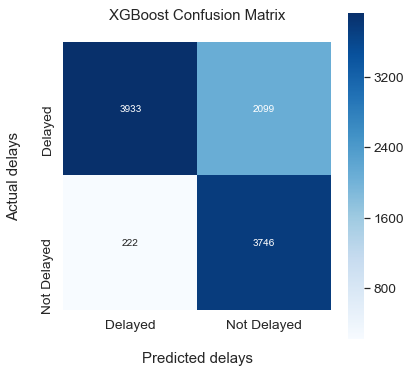

In [15]:
xgb_confusion = confusion_matrix(y_test, gbm_pred)
plt.figure(figsize=(6,6))
labels = ['Delayed', 'Not Delayed']
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True
            , xticklabels=labels, yticklabels=labels, fmt='g')
plt.xlabel('\nPredicted delays')
plt.ylabel('Actual delays\n')
plt.title('XGBoost Confusion Matrix\n');

Now that I have seen the results of the model, I will try the model on all of the data. 

In [16]:
x = df.drop(['delayed', 'arr_delay','dep_delay'], axis=1)
y = df['delayed']

In [17]:
#Split data into 3: 60% train, 20% validation, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=888)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=999)

Also, to deal with the class imbalance in my data, I increased the "scale_pos_weight" or the scale positive weight parameter to 5 which I got by taking the negative (non-delayed flights) and dividing it by the positive value (delayed flights).

In [18]:
gbm_all = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.3, 
                       subsample=1, scale_pos_weight=5,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(x_train,y_train),(x_val,y_val)] #tracking train/validation error as we go
fit_model = gbm_all.fit( 
                    x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

[0]	validation_0-auc:0.730934	validation_1-auc:0.733406
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.757957	validation_1-auc:0.76172
[2]	validation_0-auc:0.768827	validation_1-auc:0.770564
[3]	validation_0-auc:0.777406	validation_1-auc:0.781208
[4]	validation_0-auc:0.78187	validation_1-auc:0.784379
[5]	validation_0-auc:0.786868	validation_1-auc:0.789703
[6]	validation_0-auc:0.791729	validation_1-auc:0.794186
[7]	validation_0-auc:0.796333	validation_1-auc:0.798451
[8]	validation_0-auc:0.801812	validation_1-auc:0.804754
[9]	validation_0-auc:0.803503	validation_1-auc:0.806666
[10]	validation_0-auc:0.80628	validation_1-auc:0.809408
[11]	validation_0-auc:0.808682	validation_1-auc:0.811314
[12]	validation_0-auc:0.811936	validation_1-auc:0.814397
[13]	validation_0-auc:0.81433	validation_1-auc:0.816592
[14]	validation_0-auc:0.816386	validation_1-auc:0.81937
[15

[141]	validation_0-auc:0.889914	validation_1-auc:0.884195
[142]	validation_0-auc:0.890157	validation_1-auc:0.88438
[143]	validation_0-auc:0.890321	validation_1-auc:0.884535
[144]	validation_0-auc:0.890656	validation_1-auc:0.884718
[145]	validation_0-auc:0.891035	validation_1-auc:0.885153
[146]	validation_0-auc:0.891293	validation_1-auc:0.885251
[147]	validation_0-auc:0.891505	validation_1-auc:0.88545
[148]	validation_0-auc:0.891613	validation_1-auc:0.885557
[149]	validation_0-auc:0.891902	validation_1-auc:0.885704
[150]	validation_0-auc:0.892068	validation_1-auc:0.885732
[151]	validation_0-auc:0.892356	validation_1-auc:0.885917
[152]	validation_0-auc:0.89266	validation_1-auc:0.886221
[153]	validation_0-auc:0.892956	validation_1-auc:0.886446
[154]	validation_0-auc:0.893686	validation_1-auc:0.887194
[155]	validation_0-auc:0.894017	validation_1-auc:0.887427
[156]	validation_0-auc:0.894194	validation_1-auc:0.887637
[157]	validation_0-auc:0.894621	validation_1-auc:0.887982
[158]	validation_

[283]	validation_0-auc:0.918256	validation_1-auc:0.9072
[284]	validation_0-auc:0.918337	validation_1-auc:0.907299
[285]	validation_0-auc:0.918651	validation_1-auc:0.90768
[286]	validation_0-auc:0.91873	validation_1-auc:0.907754
[287]	validation_0-auc:0.919187	validation_1-auc:0.90832
[288]	validation_0-auc:0.919301	validation_1-auc:0.908359
[289]	validation_0-auc:0.919593	validation_1-auc:0.908697
[290]	validation_0-auc:0.91994	validation_1-auc:0.908974
[291]	validation_0-auc:0.920124	validation_1-auc:0.909093
[292]	validation_0-auc:0.92024	validation_1-auc:0.909191
[293]	validation_0-auc:0.920427	validation_1-auc:0.909331
[294]	validation_0-auc:0.92053	validation_1-auc:0.909332
[295]	validation_0-auc:0.920673	validation_1-auc:0.909412
[296]	validation_0-auc:0.920707	validation_1-auc:0.909434
[297]	validation_0-auc:0.920873	validation_1-auc:0.909526
[298]	validation_0-auc:0.92099	validation_1-auc:0.909579
[299]	validation_0-auc:0.921087	validation_1-auc:0.909705
[300]	validation_0-auc:

[425]	validation_0-auc:0.933565	validation_1-auc:0.919032
[426]	validation_0-auc:0.933607	validation_1-auc:0.919013
[427]	validation_0-auc:0.933664	validation_1-auc:0.919085
[428]	validation_0-auc:0.933737	validation_1-auc:0.919099
[429]	validation_0-auc:0.933775	validation_1-auc:0.919111
[430]	validation_0-auc:0.933926	validation_1-auc:0.919259
[431]	validation_0-auc:0.93402	validation_1-auc:0.919332
[432]	validation_0-auc:0.934082	validation_1-auc:0.919371
[433]	validation_0-auc:0.93419	validation_1-auc:0.919454
[434]	validation_0-auc:0.934248	validation_1-auc:0.919562
[435]	validation_0-auc:0.93431	validation_1-auc:0.919575
[436]	validation_0-auc:0.934346	validation_1-auc:0.919632
[437]	validation_0-auc:0.934423	validation_1-auc:0.919713
[438]	validation_0-auc:0.934504	validation_1-auc:0.919741
[439]	validation_0-auc:0.934552	validation_1-auc:0.919777
[440]	validation_0-auc:0.934701	validation_1-auc:0.91988
[441]	validation_0-auc:0.934805	validation_1-auc:0.919927
[442]	validation_0

[567]	validation_0-auc:0.9433	validation_1-auc:0.926337
[568]	validation_0-auc:0.943365	validation_1-auc:0.926355
[569]	validation_0-auc:0.943484	validation_1-auc:0.926424
[570]	validation_0-auc:0.943483	validation_1-auc:0.926434
[571]	validation_0-auc:0.943556	validation_1-auc:0.926424
[572]	validation_0-auc:0.94357	validation_1-auc:0.926404
[573]	validation_0-auc:0.943622	validation_1-auc:0.926428
[574]	validation_0-auc:0.943661	validation_1-auc:0.926502
[575]	validation_0-auc:0.943732	validation_1-auc:0.926523
[576]	validation_0-auc:0.943815	validation_1-auc:0.926586
[577]	validation_0-auc:0.943916	validation_1-auc:0.926664
[578]	validation_0-auc:0.94396	validation_1-auc:0.92667
[579]	validation_0-auc:0.944048	validation_1-auc:0.926736
[580]	validation_0-auc:0.944085	validation_1-auc:0.926763
[581]	validation_0-auc:0.944103	validation_1-auc:0.926765
[582]	validation_0-auc:0.944206	validation_1-auc:0.926834
[583]	validation_0-auc:0.944259	validation_1-auc:0.926869
[584]	validation_0-

[709]	validation_0-auc:0.950218	validation_1-auc:0.930861
[710]	validation_0-auc:0.950244	validation_1-auc:0.930876
[711]	validation_0-auc:0.950288	validation_1-auc:0.930917
[712]	validation_0-auc:0.950329	validation_1-auc:0.930907
[713]	validation_0-auc:0.950344	validation_1-auc:0.93092
[714]	validation_0-auc:0.950378	validation_1-auc:0.930961
[715]	validation_0-auc:0.95043	validation_1-auc:0.930989
[716]	validation_0-auc:0.950449	validation_1-auc:0.931014
[717]	validation_0-auc:0.950515	validation_1-auc:0.93107
[718]	validation_0-auc:0.950555	validation_1-auc:0.931101
[719]	validation_0-auc:0.950596	validation_1-auc:0.931121
[720]	validation_0-auc:0.950619	validation_1-auc:0.931149
[721]	validation_0-auc:0.950657	validation_1-auc:0.931167
[722]	validation_0-auc:0.950714	validation_1-auc:0.931201
[723]	validation_0-auc:0.950735	validation_1-auc:0.931249
[724]	validation_0-auc:0.950763	validation_1-auc:0.931234
[725]	validation_0-auc:0.95083	validation_1-auc:0.931285
[726]	validation_0

[851]	validation_0-auc:0.955414	validation_1-auc:0.934612
[852]	validation_0-auc:0.955438	validation_1-auc:0.934634
[853]	validation_0-auc:0.955466	validation_1-auc:0.934646
[854]	validation_0-auc:0.955482	validation_1-auc:0.934665
[855]	validation_0-auc:0.955498	validation_1-auc:0.934695
[856]	validation_0-auc:0.955537	validation_1-auc:0.9347
[857]	validation_0-auc:0.955581	validation_1-auc:0.934679
[858]	validation_0-auc:0.955604	validation_1-auc:0.934692
[859]	validation_0-auc:0.955618	validation_1-auc:0.934698
[860]	validation_0-auc:0.955663	validation_1-auc:0.93476
[861]	validation_0-auc:0.955686	validation_1-auc:0.934762
[862]	validation_0-auc:0.955719	validation_1-auc:0.934741
[863]	validation_0-auc:0.955742	validation_1-auc:0.934774
[864]	validation_0-auc:0.955768	validation_1-auc:0.934789
[865]	validation_0-auc:0.955788	validation_1-auc:0.934781
[866]	validation_0-auc:0.955819	validation_1-auc:0.93484
[867]	validation_0-auc:0.955844	validation_1-auc:0.934828
[868]	validation_0

[993]	validation_0-auc:0.959524	validation_1-auc:0.937021
[994]	validation_0-auc:0.959535	validation_1-auc:0.937036
[995]	validation_0-auc:0.959551	validation_1-auc:0.937045
[996]	validation_0-auc:0.959605	validation_1-auc:0.937057
[997]	validation_0-auc:0.959616	validation_1-auc:0.937063
[998]	validation_0-auc:0.959639	validation_1-auc:0.937086
[999]	validation_0-auc:0.959636	validation_1-auc:0.937086
[1000]	validation_0-auc:0.959651	validation_1-auc:0.937075
[1001]	validation_0-auc:0.959676	validation_1-auc:0.937123
[1002]	validation_0-auc:0.959711	validation_1-auc:0.937179
[1003]	validation_0-auc:0.959806	validation_1-auc:0.937221
[1004]	validation_0-auc:0.959829	validation_1-auc:0.937259
[1005]	validation_0-auc:0.959861	validation_1-auc:0.937291
[1006]	validation_0-auc:0.959874	validation_1-auc:0.9373
[1007]	validation_0-auc:0.959875	validation_1-auc:0.937302
[1008]	validation_0-auc:0.959901	validation_1-auc:0.937322
[1009]	validation_0-auc:0.95992	validation_1-auc:0.937344
[1010]	

[1133]	validation_0-auc:0.96289	validation_1-auc:0.939127
[1134]	validation_0-auc:0.962906	validation_1-auc:0.939142
[1135]	validation_0-auc:0.962916	validation_1-auc:0.939153
[1136]	validation_0-auc:0.962948	validation_1-auc:0.939158
[1137]	validation_0-auc:0.962971	validation_1-auc:0.939179
[1138]	validation_0-auc:0.962986	validation_1-auc:0.939205
[1139]	validation_0-auc:0.962988	validation_1-auc:0.939234
[1140]	validation_0-auc:0.963005	validation_1-auc:0.939265
[1141]	validation_0-auc:0.963043	validation_1-auc:0.939286
[1142]	validation_0-auc:0.963048	validation_1-auc:0.939304
[1143]	validation_0-auc:0.963077	validation_1-auc:0.939304
[1144]	validation_0-auc:0.963108	validation_1-auc:0.939328
[1145]	validation_0-auc:0.963121	validation_1-auc:0.939322
[1146]	validation_0-auc:0.963135	validation_1-auc:0.939336
[1147]	validation_0-auc:0.963154	validation_1-auc:0.939342
[1148]	validation_0-auc:0.963163	validation_1-auc:0.939331
[1149]	validation_0-auc:0.963187	validation_1-auc:0.93935

[1273]	validation_0-auc:0.965742	validation_1-auc:0.940642
[1274]	validation_0-auc:0.965758	validation_1-auc:0.940716
[1275]	validation_0-auc:0.965791	validation_1-auc:0.940702
[1276]	validation_0-auc:0.965815	validation_1-auc:0.940712
[1277]	validation_0-auc:0.965829	validation_1-auc:0.940699
[1278]	validation_0-auc:0.965851	validation_1-auc:0.940714
[1279]	validation_0-auc:0.965856	validation_1-auc:0.940722
[1280]	validation_0-auc:0.965867	validation_1-auc:0.940728
[1281]	validation_0-auc:0.965881	validation_1-auc:0.940734
[1282]	validation_0-auc:0.96591	validation_1-auc:0.940733
[1283]	validation_0-auc:0.965917	validation_1-auc:0.940746
[1284]	validation_0-auc:0.965942	validation_1-auc:0.94076
[1285]	validation_0-auc:0.965967	validation_1-auc:0.940805
[1286]	validation_0-auc:0.965982	validation_1-auc:0.940792
[1287]	validation_0-auc:0.965995	validation_1-auc:0.940789
[1288]	validation_0-auc:0.966017	validation_1-auc:0.940793
[1289]	validation_0-auc:0.966053	validation_1-auc:0.940807

[1413]	validation_0-auc:0.968179	validation_1-auc:0.941826
[1414]	validation_0-auc:0.968196	validation_1-auc:0.941826
[1415]	validation_0-auc:0.968214	validation_1-auc:0.941834
[1416]	validation_0-auc:0.968228	validation_1-auc:0.941836
[1417]	validation_0-auc:0.968233	validation_1-auc:0.94182
[1418]	validation_0-auc:0.968245	validation_1-auc:0.94183
[1419]	validation_0-auc:0.968268	validation_1-auc:0.94184
[1420]	validation_0-auc:0.968304	validation_1-auc:0.941861
[1421]	validation_0-auc:0.968323	validation_1-auc:0.94183
[1422]	validation_0-auc:0.968339	validation_1-auc:0.941845
[1423]	validation_0-auc:0.968344	validation_1-auc:0.94185
[1424]	validation_0-auc:0.968344	validation_1-auc:0.941866
[1425]	validation_0-auc:0.968366	validation_1-auc:0.941869
[1426]	validation_0-auc:0.96841	validation_1-auc:0.941922
[1427]	validation_0-auc:0.968422	validation_1-auc:0.941926
[1428]	validation_0-auc:0.968431	validation_1-auc:0.941913
[1429]	validation_0-auc:0.96845	validation_1-auc:0.941905
[143

[1553]	validation_0-auc:0.970347	validation_1-auc:0.943021
[1554]	validation_0-auc:0.970361	validation_1-auc:0.943013
[1555]	validation_0-auc:0.970368	validation_1-auc:0.943027
[1556]	validation_0-auc:0.970382	validation_1-auc:0.943038
[1557]	validation_0-auc:0.970383	validation_1-auc:0.943012
[1558]	validation_0-auc:0.97039	validation_1-auc:0.943018
[1559]	validation_0-auc:0.970396	validation_1-auc:0.943025
[1560]	validation_0-auc:0.970421	validation_1-auc:0.943027
[1561]	validation_0-auc:0.970423	validation_1-auc:0.943026
[1562]	validation_0-auc:0.970449	validation_1-auc:0.943055
[1563]	validation_0-auc:0.970491	validation_1-auc:0.943074
[1564]	validation_0-auc:0.970494	validation_1-auc:0.94306
[1565]	validation_0-auc:0.970526	validation_1-auc:0.94307
[1566]	validation_0-auc:0.970548	validation_1-auc:0.943087
[1567]	validation_0-auc:0.970563	validation_1-auc:0.943078
[1568]	validation_0-auc:0.970575	validation_1-auc:0.943077
[1569]	validation_0-auc:0.970583	validation_1-auc:0.943084


[1693]	validation_0-auc:0.972432	validation_1-auc:0.943664
[1694]	validation_0-auc:0.972454	validation_1-auc:0.943676
[1695]	validation_0-auc:0.97246	validation_1-auc:0.943677
[1696]	validation_0-auc:0.972464	validation_1-auc:0.943684
[1697]	validation_0-auc:0.972475	validation_1-auc:0.943696
[1698]	validation_0-auc:0.972484	validation_1-auc:0.9437
[1699]	validation_0-auc:0.972509	validation_1-auc:0.943694
[1700]	validation_0-auc:0.972533	validation_1-auc:0.94369
[1701]	validation_0-auc:0.972547	validation_1-auc:0.943699
[1702]	validation_0-auc:0.972559	validation_1-auc:0.943686
[1703]	validation_0-auc:0.972559	validation_1-auc:0.943702
[1704]	validation_0-auc:0.972567	validation_1-auc:0.943707
[1705]	validation_0-auc:0.97257	validation_1-auc:0.943711
[1706]	validation_0-auc:0.972581	validation_1-auc:0.943718
[1707]	validation_0-auc:0.972595	validation_1-auc:0.943734
[1708]	validation_0-auc:0.972602	validation_1-auc:0.943723
[1709]	validation_0-auc:0.972609	validation_1-auc:0.943722
[1

In [20]:
gbm_all_pred = gbm_all.predict(x_test, ntree_limit=gbm_all.best_ntree_limit)
gbm_all_accuracy = accuracy_score(y_test, gbm_all_pred)
gbm_all_f1 = f1_score(y_test, gbm_all_pred)
print('XGBoost Test Accuracy:', gbm_all_accuracy)
print('XGBoost Test F1:', gbm_all_f1)

XGBoost Test Accuracy: 0.9023368559824789
XGBoost Test F1: 0.7136712175051431


In [21]:
gbm_val_pred = gbm_all.predict(x_val, ntree_limit=gbm_all.best_ntree_limit)
gbm_val_accuracy = accuracy_score(y_val, gbm_val_pred)
gbm_val_f1 = f1_score(y_val, gbm_val_pred)
print('XGBoost Validation Accuracy:', gbm_val_accuracy)
print('XGBoost Validation F1:', gbm_val_f1)

XGBoost Validation Accuracy: 0.9012098917689085
XGBoost Validation F1: 0.7165690580771108


As we can see, the validation and test sets have about the same scores, meaning there isn't any overfitting. 

Let's take a look at the confusion matrix.

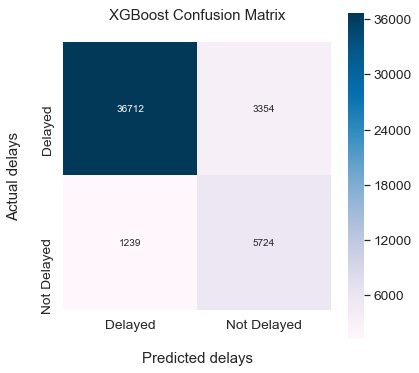

In [22]:
xgb_confusion = confusion_matrix(y_test, gbm_all_pred)
plt.figure(figsize=(6,6))
labels = ['Delayed', 'Not Delayed']
sns.heatmap(xgb_confusion, cmap='PuBu', annot=True, square=True
            , xticklabels=labels, yticklabels=labels, fmt='g')
plt.xlabel('\nPredicted delays')
plt.ylabel('Actual delays\n')
plt.title('XGBoost Confusion Matrix\n');

Even though it is unclear how the features affect the delays, let's still take a look at which features were most important. 

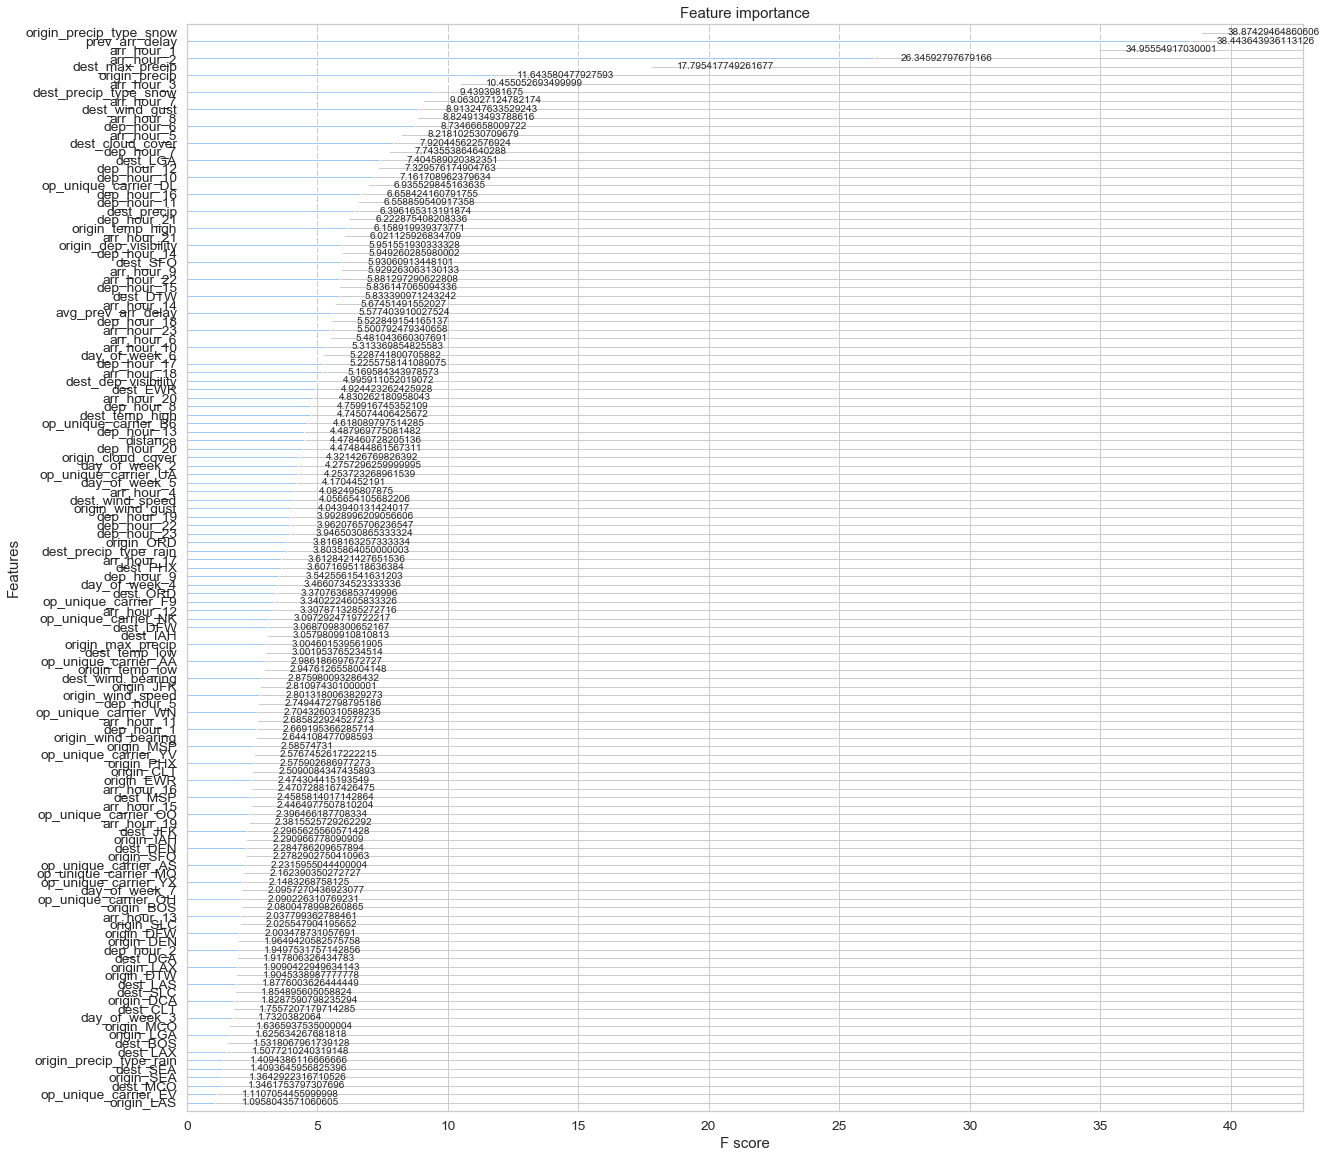

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
# xgb.plot_importance(gbm)
xgb.plot_importance(gbm_all, importance_type='gain', ax=ax)

In [24]:
feature_importances_xgb = pd.DataFrame(gbm_all.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_xgb.head(30)

,importance
origin_precip_type_snow,0.059968
prev_arr_delay,0.059304
arr_hour_1,0.053923
arr_hour_2,0.040641
dest_max_precip,0.027451
origin_precip,0.017962
arr_hour_3,0.016128
dest_precip_type_snow,0.014561
arr_hour_7,0.013981
dest_wind_gust,0.013750


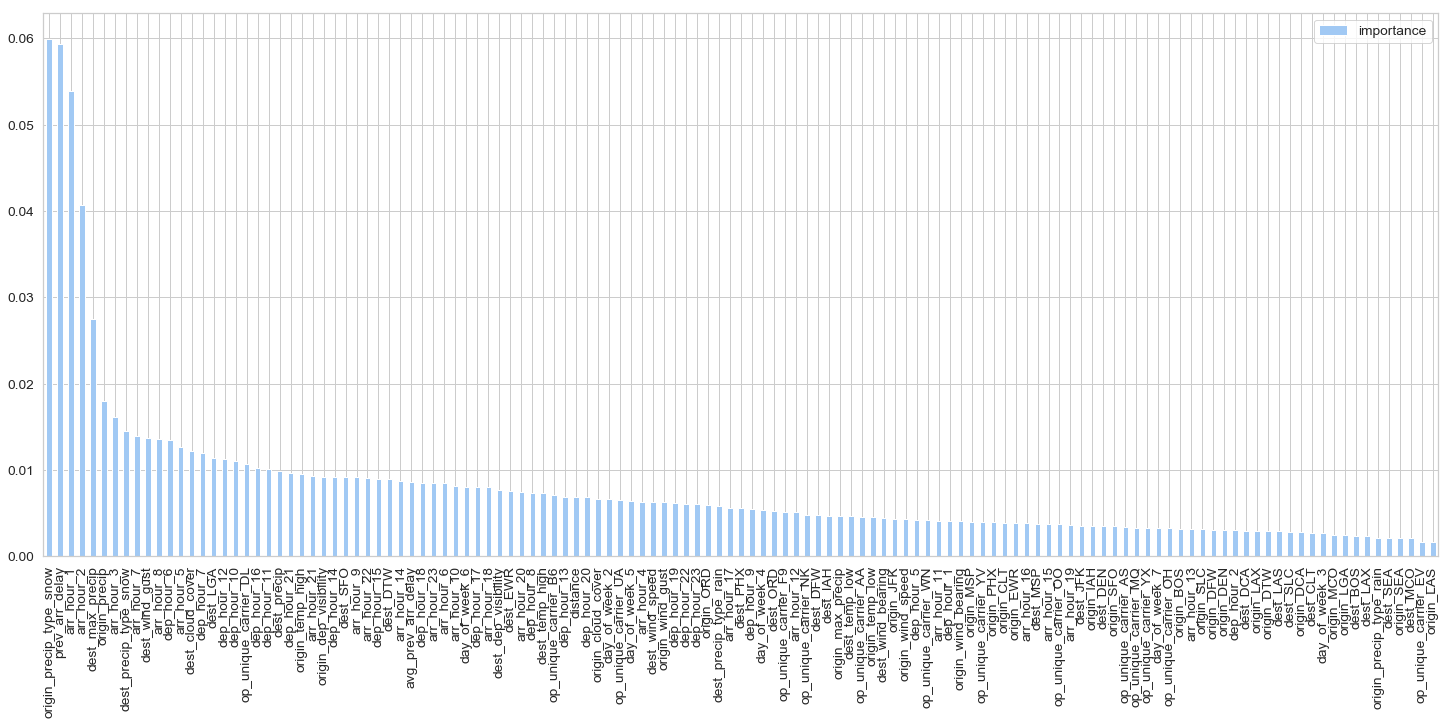

In [25]:
fig, ax = plt.subplots(1,1, figsize=(25,10))
feature_importances_xgb.plot(kind='bar', ax=ax)

## SHAP 

Using SHAP (SHapley Additive exPlanations) library, we can get some insigh on how the features above affect the outcomes. SHAP is a way to explain the output of a model especially for explaining XGBoost and other gradient boosting, tree ensemble methods. 

In [26]:
import shap

In [27]:
shap.initjs()

In [28]:
explainer = shap.TreeExplainer(gbm_all)
shap_values = explainer.shap_values(x)

In [29]:
shap.force_plot(explainer.expected_value, shap_values[12493,:], x.iloc[12493,:])

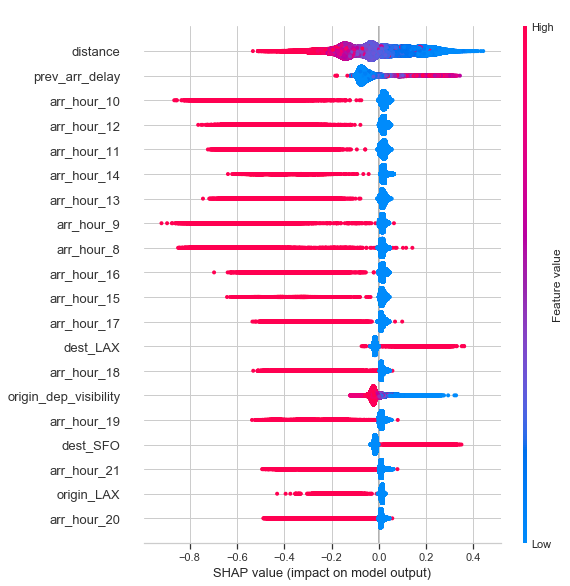

In [30]:
shap.summary_plot(shap_values, x)